# Introduction 

Throughout this entire notebook you should be experimenting with the code in the non-text cells. A great way to begin to get a feel for Python is by playing with it. So have some fun by changing the values in the cells and then running them again with Shift-Enter. Before you do, think about what you expect the output to be, and make sure your intuition matches up with what you run. If it doesn't, take some time to think about what happened so you can hone your intuition.

At the end of each section there will be some questions to help further your understanding. Remember, in Python we can always manually test code by running it; however, you should try to think about the answers to these questions before you run some code. This way you can check and verify your understanding of the section's topic.

## A quick look at vizualization in Pandas

There are numerous libraries available in Python for creating vizualizations. Often times, we will probably be using [Matplotlib](http://matplotlib.org/) and/or [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) for anything that is general purpose, and then other libraries if we need something more specialized ([Plotly](https://plot.ly/) for dashboards, for example). All of these libraries allow us to build great looking visualizations that can be used in a production setting. If we want something quick and dirty to visualize our data very easily, there is also some plotting functionality built into Pandas. 

If we look at the [docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html), we can see that the plotting available with Pandas will be called via the `plot()` method on a DataFrame object. From there, we'll pass in a bunch of potential arguments to the `plot()` method to specify exactly how to build the plot. The most important of those arguments is the `kind` keyword argument, which tells the `plot()` method what kind of visualization we would like (bar plot, histogram, scatter plot, etc.). Tonight we'll look at one or two examples - since most of the time we'll be doing your visualization in Matplotlib or Seaborn, we'll just give you a taste of what Pandas can do so that you know it's there. We'll look at Seaborn and Matplotlib in a little bit more depth in a later class. 

In [2]:
# Code to get ours to function correctly. Pandas plotting is built on top of matplotlib, so 
# we have to import it. 
import matplotlib.pyplot as plt
# This just tells the IPython notebook to plot it inline (i.e. in the browser).
%matplotlib inline
# This will change the style that matplotlib uses (i.e. makes the plots look nicer than the default)
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
import pandas as pd
df = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [4]:
# Revisit the data to see what it looks like. 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


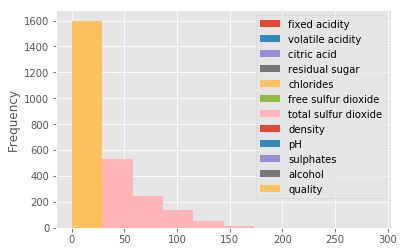

In [5]:
# Let's try a histogram first. 
df.plot(kind='hist') 

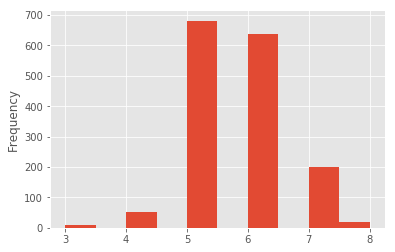

In [6]:
# That looked pretty bad. Since we didn't specify a column name to plot, Pandas just plotted
# all of them on top of one another. That's not what we want! Let's try selecting a column and doing that again. 
df['quality'].plot(kind='hist')

In [7]:
# This will not work. Any guesses why? #scatter need a x and y column to know what to scatter
#df.plot(kind='scatter')

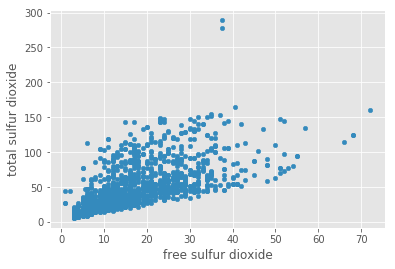

In [8]:
# As you might guess from the error, we have to specify X and Y columns for Pandas to plot. 
df.plot(kind='scatter', x='free sulfur dioxide', y='total sulfur dioxide')

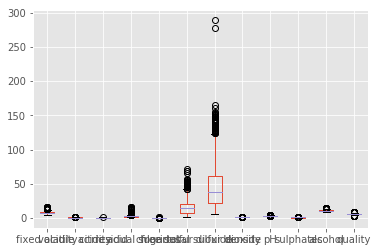

In [9]:
df.plot(kind='box')

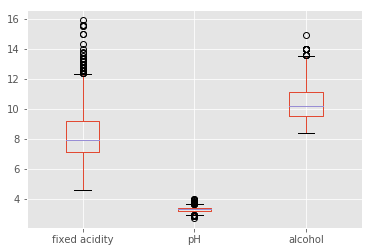

In [10]:
# We don't need to specify a column necessarily, but because of the different scales this 
# doesn't look too great. Let's specify three columns and see how that looks...
df[['fixed acidity', 'pH', 'alcohol']].plot(kind='box')

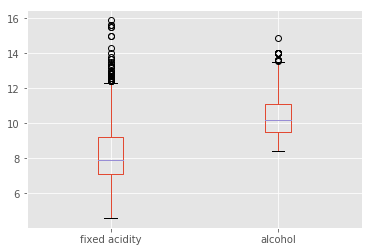

In [11]:
# This still doesn't look great - it's hard to really examine these three columns since pH is 
# so different from the other two. Let's drop pH and try one more time...
df[['fixed acidity', 'alcohol']].plot(kind='box')

##### Plotting Questions

1. Create a `scatterplot` between two variables of your choosing. 
2. Create a `barplot` between one to three variables of your choosing. 

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


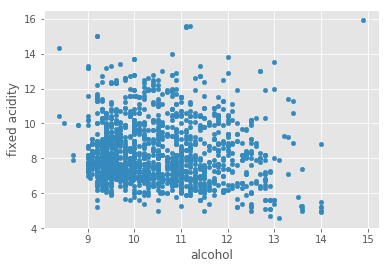

In [13]:
df.plot(kind = 'scatter', x = 'alcohol', y = 'fixed acidity')

Text(0, 0.5, 'alcohol')

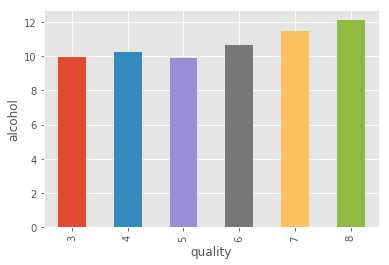

In [14]:
df.groupby('quality').agg('mean').alcohol.plot(kind =  'bar').set_ylabel('alcohol')

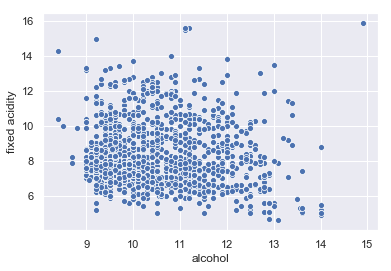

In [15]:
import seaborn as sns
sns.set()
sns.scatterplot(x = 'alcohol', y='fixed acidity', data=df)

/Users/flori/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


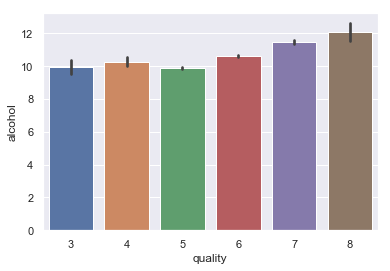

In [16]:
sns.barplot(x ='quality', y='alcohol', data=df)

Text(0.5, 0, 'alcohol')

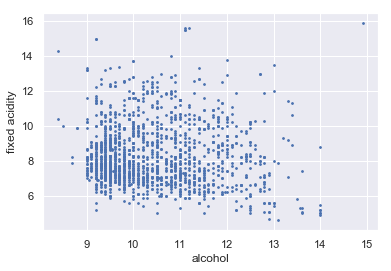

In [17]:
plt.scatter(x=df['alcohol'], y=df['fixed acidity'], s = 3)
plt.ylabel('fixed acidity')
plt.xlabel('alcohol')